<a href="https://colab.research.google.com/github/hohouho/testing/blob/main/ECE_131A_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 131A final project question 1

In [ ]:
import random

def toss_fair_die(num_tosses):
    num_odd = 0
    die = [1,2,3,4,5,6,7,8,9,10]
    for i in range(num_tosses):
        roll = random.choice(die)
        if roll % 2 != 0:
            num_odd += 1
    return num_odd / num_tosses

num_tosses = [50, 100, 1000, 2000, 3000, 10000, 100000]
for t in num_tosses:
    odd_prob = toss_fair_die(t)
    print("1A:Tossing the 10-sided fair die", t, "times, the estimated probability of obtaining an odd number is", odd_prob)

1A:Tossing the 10-sided fair die 50 times, the estimated probability of obtaining an odd number is 0.52
1A:Tossing the 10-sided fair die 100 times, the estimated probability of obtaining an odd number is 0.48
1A:Tossing the 10-sided fair die 1000 times, the estimated probability of obtaining an odd number is 0.481
1A:Tossing the 10-sided fair die 2000 times, the estimated probability of obtaining an odd number is 0.4895
1A:Tossing the 10-sided fair die 3000 times, the estimated probability of obtaining an odd number is 0.4886666666666667
1A:Tossing the 10-sided fair die 10000 times, the estimated probability of obtaining an odd number is 0.4944
1A:Tossing the 10-sided fair die 100000 times, the estimated probability of obtaining an odd number is 0.50246


In [ ]:
def toss_unfair_die(num_tosses):
    num_odd = 0
    die = [1,1,2,3,3,4,5,5,6,7,7,8,9,9,10]
    for i in range(num_tosses):
        roll = random.choice(die)
        if roll % 2 != 0:
            num_odd += 1
    return num_odd / num_tosses

num_tosses = [50, 100, 1000, 2000, 3000, 10000, 100000]
for t in num_tosses:
    odd_prob = toss_unfair_die(t)
    print("1D:Tossing the 10-sided unfair die", t, "times, the estimated probability of obtaining an odd number is", odd_prob)

1D:Tossing the 10-sided unfair die 50 times, the estimated probability of obtaining an odd number is 0.62
1D:Tossing the 10-sided unfair die 100 times, the estimated probability of obtaining an odd number is 0.63
1D:Tossing the 10-sided unfair die 1000 times, the estimated probability of obtaining an odd number is 0.65
1D:Tossing the 10-sided unfair die 2000 times, the estimated probability of obtaining an odd number is 0.6675
1D:Tossing the 10-sided unfair die 3000 times, the estimated probability of obtaining an odd number is 0.6666666666666666
1D:Tossing the 10-sided unfair die 10000 times, the estimated probability of obtaining an odd number is 0.6619
1D:Tossing the 10-sided unfair die 100000 times, the estimated probability of obtaining an odd number is 0.66577


## ECE 131A final project question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# load data from file
data = np.loadtxt('data.txt')

# calculate MLE of mu
mu_MLE = np.mean(data)

# calculate MLE of sigma
sigma_MLE = np.sqrt(np.mean((data - mu_MLE)**2))

print("Maximum likelihood estimates:")
print("mu_MLE =", mu_MLE)
print("sigma_MLE =", sigma_MLE)

Maximum likelihood estimates:
mu_MLE = 20.0134506689949
sigma_MLE = 9.99241980846411


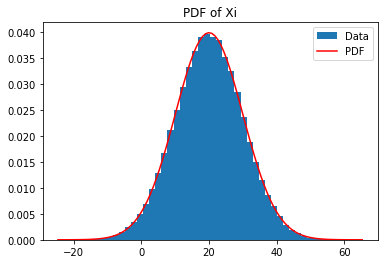

In [ ]:
# plot histogram of data
plt.hist(data, bins=50, density=True, label='Data')

# plot PDF of Gaussian distribution with MLE parameters
x = np.linspace(np.min(data), np.max(data), 100)
pdf = norm(mu_MLE, sigma_MLE).pdf(x)
plt.title('PDF of Xi')
plt.plot(x, pdf, 'r', label='PDF')

plt.legend()
plt.show()

# ECE 131A final project question 3

PMF of Bought:
0    0.614431
1    0.385569
Name: Bought, dtype: float64

PMF of Spender Type:
3    0.535513
1    0.257046
2    0.207441
Name: Spender Type, dtype: float64

PMF of Sex:
0    0.645998
1    0.354002
Name: Sex, dtype: float64

PMF of Age:
37    0.046223
43    0.041714
33    0.040586
45    0.039459
39    0.038331
        ...   
89    0.001127
68    0.001127
84    0.001127
81    0.001127
15    0.001127
Name: Age, Length: 72, dtype: float64


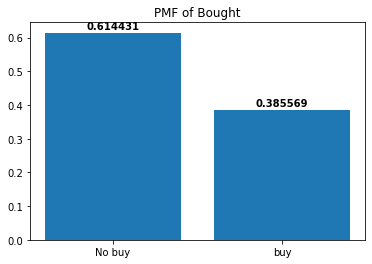

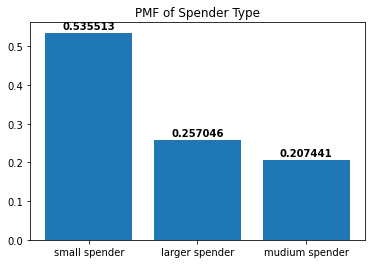

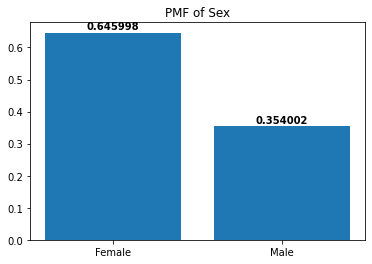

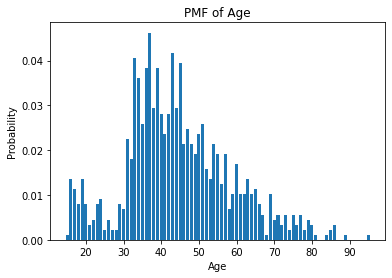

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


data = pd.read_csv('user_data.csv')

# PMF of B
pmf_b = data['Bought'].value_counts(normalize=True)
print("PMF of Bought:")
print(pmf_b)

# PMF of T
pmf_t = data['Spender Type'].value_counts(normalize=True)
print("\nPMF of Spender Type:")
print(pmf_t)

# PMF of S
pmf_s = data['Sex'].value_counts(normalize=True)
print("\nPMF of Sex:")
print(pmf_s)

# PMF of A
pmf_a = data['Age'].value_counts(normalize=True)
print("\nPMF of Age:")
print(pmf_a)

# Plot PMF of B
Buy_no_Buy = []
for i in data["Bought"]:
  if i == 1:
        Buy_no_Buy.append("buy")
  else:
        Buy_no_Buy.append("No buy")
pmf_b = data["Bought"].value_counts(normalize=True)
plt.bar(pmf_b.index.map({1: "buy", 0: "No buy"}), pmf_b.values)
for i, v in enumerate(pmf_b.values):
    plt.text(i, v+0.01, f"{v:.6f}", ha='center', fontweight='bold')
plt.title('PMF of Bought')
plt.show()

# Plot PMF of T
Spender_type = []
for i in data["Spender Type"]:
  if i == 1:
        Spender_type.append("larger spender")
  elif i == 2:
        Spender_type.append("mudium spender")
  else:
        Spender_type.append("small spender")
pmf_t = data["Spender Type"].value_counts(normalize=True)
plt.bar(pmf_t.index.map({1: "larger spender", 2 : "mudium spender", 3 : "small spender"}), pmf_t.values)
for i, v in enumerate(pmf_t.values):
    plt.text(i, v+0.01, f"{v:.6f}", ha='center', fontweight='bold')
plt.title('PMF of Spender Type')
plt.show()

# Plot PMF of S
Sex_of_user = []
for i in data["Sex"]:
  if i == 1:
        Buy_no_Buy.append("Male")
  else:
        Buy_no_Buy.append("Female")
pmf_s = data["Sex"].value_counts(normalize=True)
plt.bar(pmf_b.index.map({1: "Male", 0: "Female"}), pmf_s.values)
for i, v in enumerate(pmf_s.values):
    plt.text(i, v+0.01, f"{v:.6f}", ha='center', fontweight='bold')
plt.title('PMF of Sex')
plt.show()

# Plot PMF of A
plt.bar(pmf_a.index, pmf_a.values)
plt.title('PMF of Age')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()

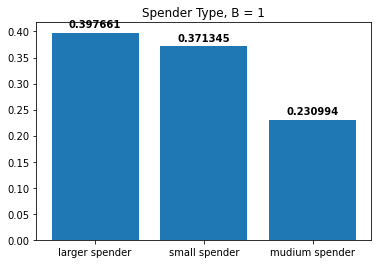

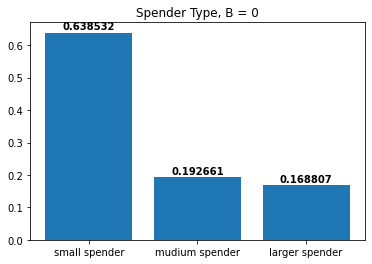

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('user_data.csv')

# Conditional PMF of T conditioned on B=1
subset = data[data['Bought'] == 1]['Spender Type']
title = 'Spender Type, B = 1'
pmf = subset.value_counts(normalize=True)
Spender_type = []
for i in data["Spender Type"]:
  if i == 1:
        Spender_type.append("larger spender")
  elif i == 2:
        Spender_type.append("mudium spender")
  else:
        Spender_type.append("small spender")
plt.bar(pmf.index.map({1: "larger spender", 2 : "mudium spender", 3 : "small spender"}), pmf.values)
for i, v in enumerate(pmf.values):
    plt.text(i, v+0.01, f"{v:.6f}", ha='center', fontweight='bold')
plt.title(title)
plt.show()

# Conditional PMF of T conditioned on B=0
subset = data[data['Bought'] == 0]['Spender Type']
title = 'Spender Type, B = 0'
pmf = subset.value_counts(normalize=True)
plt.bar(pmf.index.map({1: "larger spender", 2 : "mudium spender", 3 : "small spender"}), pmf.values)
for i, v in enumerate(pmf.values):
    plt.text(i, v+0.01, f"{v:.6f}", ha='center', fontweight='bold')
plt.title(title)
plt.show()

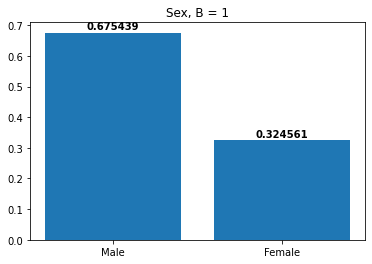

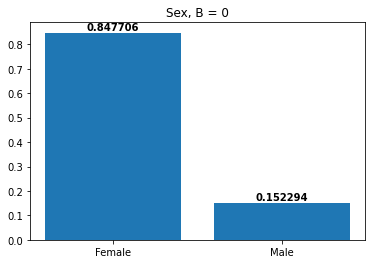

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('user_data.csv')

# Conditional PMF of S conditioned on B=1
subset = data[data['Bought'] == 1]['Sex']
title = 'Sex, B = 1'
pmf = subset.value_counts(normalize=True)
Sex_of_user = []
for i in data["Sex"]:
  if i == 1:
        Buy_no_Buy.append("Male")
  else:
        Buy_no_Buy.append("Female")
plt.bar(pmf.index.map({1: "Male", 0: "Female"}), pmf.values)
for i, v in enumerate(pmf.values):
    plt.text(i, v+0.01, f"{v:.6f}", ha='center', fontweight='bold')
plt.title(title)
plt.show()

# Conditional PMF of S conditioned on B=0
subset = data[data['Bought'] == 0]['Sex']
title = 'Sex, B = 0'
pmf = subset.value_counts(normalize=True)
plt.bar(pmf.index.map({1: "Male", 0: "Female"}), pmf.values)
for i, v in enumerate(pmf.values):
    plt.text(i, v+0.01, f"{v:.6f}", ha='center', fontweight='bold')
plt.title(title)
plt.show()

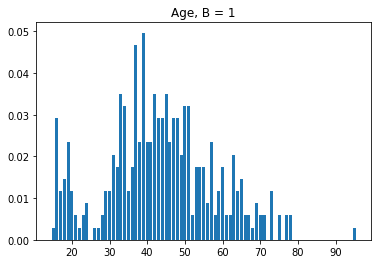

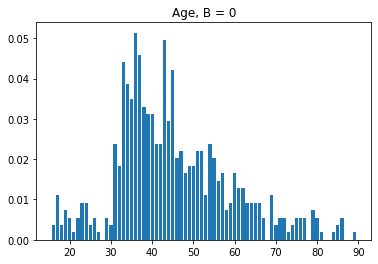

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('user_data.csv')

# Conditional PMF of A conditioned on B=1
subset = data[data['Bought'] == 1]['Age']
title = 'Age, B = 1'
pmf = subset.value_counts(normalize=True)
plt.bar(pmf.index, pmf.values)
plt.title(title)
plt.show()

# Conditional PMF of A conditioned on B=0
subset = data[data['Bought'] == 0]['Age']
title = 'Age, B = 0'
pmf = subset.value_counts(normalize=True)
plt.bar(pmf.index, pmf.values)
plt.title(title)
plt.show()

# ECE 131A final project question 4

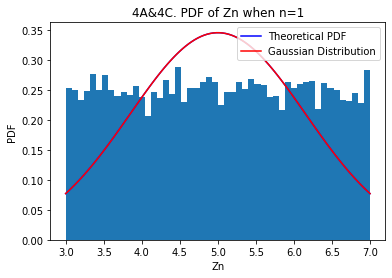

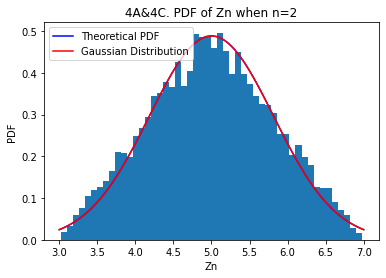

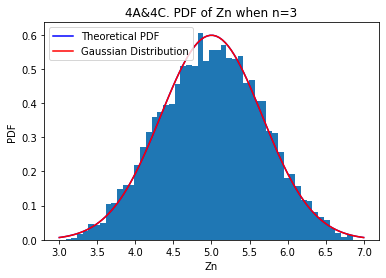

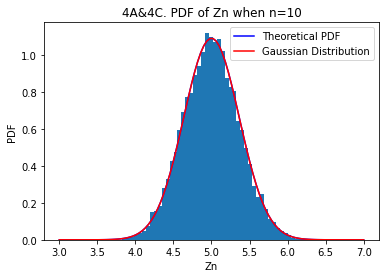

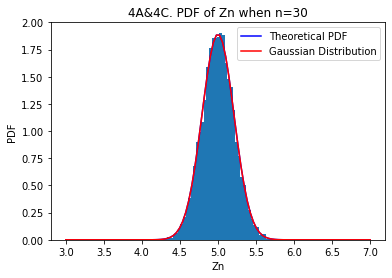

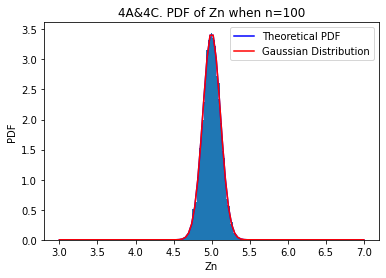

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
n_list = [1, 2, 3, 10, 30, 100]  # Different sample sizes
t = 10000  # Number of samples to generate

# Define the random variables
def X():
    return np.random.uniform(3, 7)

# Generate the samples and plot the histograms
for n in n_list:
    Z = np.zeros(t)
    for i in range(t):
        Z[i] = np.mean([X() for j in range(n)])
    plt.hist(Z, bins=50, density=True)
    plt.title(f'4A&4C. PDF of Zn when n={n}')
    plt.xlabel('Zn')
    plt.ylabel('PDF')

    # Plot the theoretical PDF
    x = np.linspace(3, 7, 100)
    mu = (3 + 7) / 2  # Mean of X
    sigma = (7 - 3) ** 2 / 12  # Variance of X
    plt.plot(x, 1 / np.sqrt(2 * np.pi * sigma / n) *
             np.exp(-(x - mu) ** 2 / (2 * sigma / n)), 'b', label='Theoretical PDF')

    # Plot the Gaussian distribution
    mu_n = 5
    sigma_n = np.sqrt(4/3/n)
    plt.plot(x, 1 / np.sqrt(2 * np.pi * sigma_n**2) *
             np.exp(-(x - mu_n)**2 / (2 * sigma_n**2)), 'r', label='Gaussian Distribution')

    # Add a legend to the plot
    plt.legend()
    # Save the plot to a file
    plt.show()

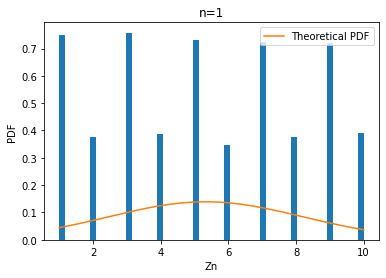

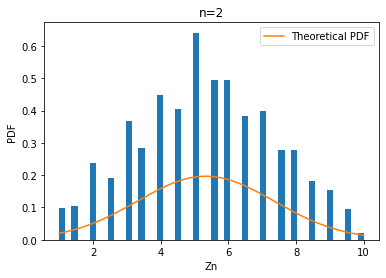

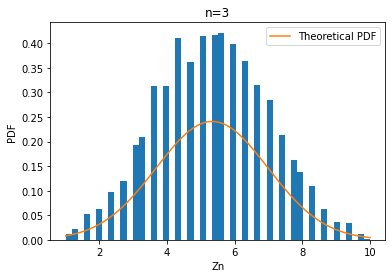

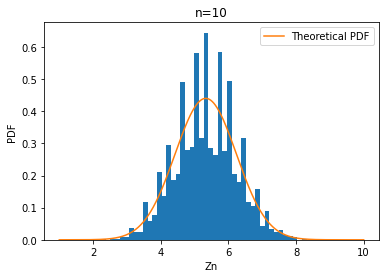

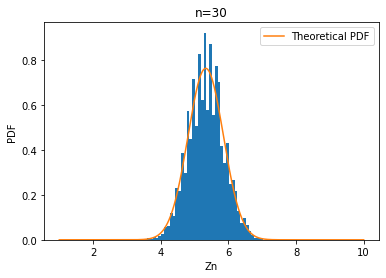

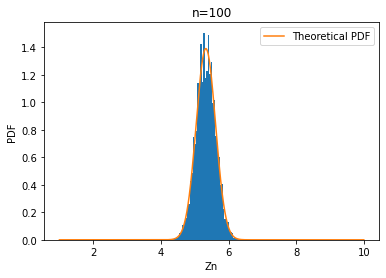

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters

n_list = [1, 2, 3, 10, 30, 100]  # Different sample sizes
t = 10000  # Number of samples to generate

# Calculate the mean and variance
mu = 5.33
var = 0
for i in [1, 1, 2, 3, 3, 4, 5, 5, 6, 7, 7, 8, 9, 9, 10]:
  var += (i - mu) ** 2 / 15


# Generate the samples and plot the histograms
for n in n_list:
    Z = np.zeros(t)
    for i in range(t):
      rand = []
      for r in range(n):
        rand.append(random.choices([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], weights=[2, 1, 2, 1, 2, 1, 2, 1, 2, 1]))
        # Z[i] = np.mean([X() for j in range(n)])
        Z[i] = np.mean(rand)
    plt.hist(Z, bins=50, density=True)
    plt.title(f'n={n}')
    plt.xlabel('Zn')
    plt.ylabel('PDF')

    # Plot the theoretical PDF
    x = np.linspace(1, 10, 1000)
    plt.plot(x, norm.pdf(x, mu, np.sqrt(var / n)), label='Theoretical PDF')
    # Add a legend to the plot
    plt.legend()
    # Save the plot to a file
    plt.show()